In [1]:
import pandas as pd
import numpy as np

# Data Loading

In [2]:
df = pd.read_csv('/Users/yanglan/Desktop/Marketing Analytics/final/Copy of subscribers (1).csv')
df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020/1/31 23:58,2020/5/31 23:58,NaN,True


In [3]:
df['discount_price']

0         4.5141
1         4.5141
2         4.5141
3         4.5141
4         4.5141
           ...  
227623    4.5141
227624    4.5141
227625    4.5141
227626    4.5141
227627    4.5141
Name: discount_price, Length: 227628, dtype: float64

# Segmentation

## Data Preprocessing for Clustering

In [23]:
#drop the unnecessary information

df_seg_v0 = df.drop(df.columns[[0,3,7,10,11,12,13,14,16,17,18,19,20,21,22,23,27,28,29]], axis=1)


#only focus on those who are loyal enough
condition1 = df_seg_v0['current_sub_TF'] = True
condition2 = df_seg_v0['trial_completed'] = True
condition3 = df_seg_v0['weekly_consumption_hour'].astype(float) > 0
condition4 = df_seg_v0['age'].astype(float) <= 105
condition5 = df_seg_v0['payment_period'].astype(int) >= 1

df_seg = df_seg_v0[condition1&condition2&condition3&condition4&condition5]
df_seg = df_seg.drop(columns=['current_sub_TF','trial_completed','num_trial_days'])
df_seg['trial_type'] = df_seg['plan_type'].map(lambda x:x[:4])
df_seg = df_seg[df_seg['trial_type']!='low_']
df_seg = df_seg.drop(columns = 'plan_type')
df_seg_v1 = df_seg.dropna()
df_seg_v1

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,payment_period,trial_type
1,23383224,base,comedy,access to exclusive content,22.951579,70.0,False,1,base
4,26723159,base,comedy,replace OTT,22.951579,28.0,False,2,base
5,24810928,base,comedy,access to exclusive content,20.051667,70.0,False,1,base
6,29726122,base,comedy,access to exclusive content,20.051667,61.0,False,1,base
7,20299962,base,drama,access to exclusive content,34.551230,23.0,False,1,base
...,...,...,...,...,...,...,...,...,...
227621,25549852,enhanced,comedy,access to exclusive content,28.751405,61.0,False,1,base
227622,25835684,base,drama,access to exclusive content,24.401536,43.0,False,1,base
227623,21434712,enhanced,comedy,supplement OTT,28.751405,38.0,False,1,base
227624,25843074,enhanced,comedy,replace OTT,27.301448,49.0,False,1,base


In [14]:
df_seg_v1.dtypes

subid                        int64
package_type                object
preferred_genre             object
intended_use                object
weekly_consumption_hour    float64
age                        float64
male_TF                     object
payment_period               int64
trial_type                  object
dtype: object

In [15]:
df_seg_v1.isna().sum()

subid                      0
package_type               0
preferred_genre            0
intended_use               0
weekly_consumption_hour    0
age                        0
male_TF                    0
payment_period             0
trial_type                 0
dtype: int64

In [24]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_transformed = ohe.fit_transform(df_seg_v1.iloc[:,[1,2,3,6,8]]).toarray()
df_transformed2 = ohe.get_feature_names() 
print (df_transformed2)
print (df_transformed)

['x0_base' 'x0_economy' 'x0_enhanced' 'x1_comedy' 'x1_drama'
 'x1_international' 'x1_other' 'x1_regional'
 'x2_access to exclusive content' 'x2_education'
 'x2_expand international access' 'x2_expand regional access' 'x2_other'
 'x2_replace OTT' 'x2_supplement OTT' 'x3_False' 'x3_True' 'x4_base'
 'x4_high']
[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


/Users/yanglan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
#reorganize the whole data
df_transformed3 = pd.DataFrame (df_transformed, 
                                columns = ['package_base','package_economy','package_enhanced',
                                           'genre_comedy','genre_drama','genre_international',
                                           'genre_other','genre_regional',
                                          'use_exclusive','use_education','use_international',
                                          'use_regional','use_other','use_replaceOTT','use_supplementOTT',
                                          'female','male','trial_base','trial_high'])
df_seg_cat = df_transformed3.drop(columns = ['trial_high','male'])
df_seg_num = df_seg_v1.drop(columns = ['package_type','preferred_genre','intended_use','male_TF','trial_type'])
df_seg_num.index = range(len(df_seg_num))
df_seg_final = pd.concat((df_seg_cat,df_seg_num),axis = 1)
seg_w_id = df_seg_final
df_seg_final = df_seg_final.drop(columns='subid')

In [7]:
#Normalization
order = ['package_base', 'package_economy', 'package_enhanced',
       'genre_comedy', 'genre_drama', 'genre_international',
       'genre_other', 'genre_regional', 'use_exclusive', 'use_education',
       'use_international', 'use_regional', 'use_other', 'use_replaceOTT',
       'use_supplementOTT', 'female', 'trial_base',
       'weekly_consumption_hour', 'age', 'payment_period']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
seg = pd.DataFrame(scaler.fit_transform(df_seg_final),columns = order)

seg

,package_base,package_economy,package_enhanced,genre_comedy,genre_drama,genre_international,genre_other,genre_regional,use_exclusive,use_education,use_international,use_regional,use_other,use_replaceOTT,use_supplementOTT,female,trial_base,weekly_consumption_hour,age,payment_period
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.274510,0.666667,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.274510,0.266667,0.5
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.235294,0.666667,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.235294,0.580952,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.431373,0.219048,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91838,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.352941,0.580952,0.0
91839,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.294118,0.409524,0.0
91840,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.352941,0.361905,0.0
91841,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.333333,0.466667,0.0


In [26]:
n_seg_id = seg
n_seg_id['subid']=seg_w_id['subid']

## Clustering

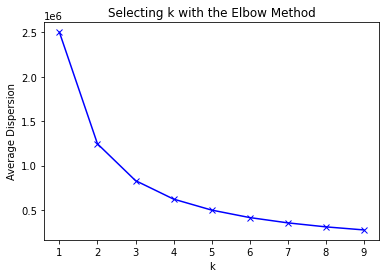

In [27]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(seg)
    meandistortions.append(sum(np.min(cdist(seg, kmeans.cluster_centers_, 'euclidean'), axis=1))/seg.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

#### The best k is 2 !!

In [28]:
#Fit the model with k=3
km = KMeans(n_clusters = 2)
km.fit(seg)
label = km.labels_
center = km.cluster_centers_
print(label)

[0 1 0 ... 0 0 1]


In [29]:
seg['labels']=km.labels_
seg

,package_base,package_economy,package_enhanced,genre_comedy,genre_drama,genre_international,genre_other,genre_regional,use_exclusive,use_education,...,use_other,use_replaceOTT,use_supplementOTT,female,trial_base,weekly_consumption_hour,age,payment_period,subid,labels
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.274510,0.666667,0.0,23383224,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.274510,0.266667,0.5,26723159,1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.235294,0.666667,0.0,24810928,0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.235294,0.580952,0.0,29726122,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.431373,0.219048,0.0,20299962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91838,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.352941,0.580952,0.0,25431503,1
91839,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.294118,0.409524,0.0,27107041,1
91840,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.352941,0.361905,0.0,20769172,0
91841,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.333333,0.466667,0.0,23204406,0


In [21]:
df_seg_final['labels']=km.labels_
df_seg_final.to_excel(r'segmentation_final!!!!!.xlsx', index=True)

In [15]:
seg.to_excel(r'segmentation_final.xlsx', index=True)

In [12]:
seg.groupby('labels').count()

,package_base,package_economy,package_enhanced,genre_comedy,genre_drama,genre_international,genre_other,genre_regional,use_exclusive,use_education,...,use_regional,use_other,use_replaceOTT,use_supplementOTT,female,trial_base,weekly_consumption_hour,age,payment_period,subid
labels,,,,,,,,,,,,,,,,,,,,,
0,30540,30540,30540,30540,30540,30540,30540,30540,30540,30540,...,30540,30540,30540,30540,30540,30540,30540,30540,30540,30540
1,30550,30550,30550,30550,30550,30550,30550,30550,30550,30550,...,30550,30550,30550,30550,30550,30550,30550,30550,30550,30550
2,30753,30753,30753,30753,30753,30753,30753,30753,30753,30753,...,30753,30753,30753,30753,30753,30753,30753,30753,30753,30753


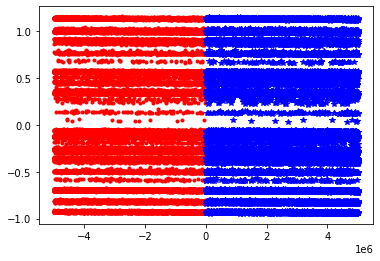

In [44]:
new_df=seg[:]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(new_df))

d = new_pca[new_df['labels'] == 0]
plt.plot(d[0], d[1], 'r.')
d = new_pca[new_df['labels'] == 1]
plt.plot(d[0], d[1], 'b*')
d = new_pca[new_df['labels'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.gcf().savefig('kmeans.png')
plt.show()

In [52]:
import pickle
res = open('/Users/yanglan/Desktop/Marketing Analytics/final/customer_service_reps','rb')
service = pickle.load(res)
service1 = service.groupby('customer_service_rep_id').count()
service1['All Subscribers'] = service.groupby('customer_service_rep_id')['current_sub_TF'].count()
service1['Current Subscribers'] = service.groupby('customer_service_rep_id')['current_sub_TF'].sum()
service1['Retention Rate'] = service1['Current Subscribers']/service1['All Subscribers']
service1 = service1[['All Subscribers','Current Subscribers','Retention Rate']]
service1.describe()

,All Subscribers,Current Subscribers,Retention Rate
count,1031.000000,1031.000000,1031.000000
mean,2142.233754,793.683802,0.398855
std,1330.678226,480.785929,0.121729
min,3.000000,0.000000,0.000000
25%,1005.500000,345.500000,0.347187
50%,2465.000000,882.000000,0.370066
75%,3350.500000,1240.000000,0.427042
max,5323.000000,2203.000000,1.000000


In [53]:
service1

,All Subscribers,Current Subscribers,Retention Rate
customer_service_rep_id,,,
30004656,2881,986,0.342242
30005886,3415,1251,0.366325
30015945,1153,602,0.522116
30030735,3589,1265,0.352466
30034436,2840,1083,0.381338
...,...,...,...
39974556,3821,1354,0.354357
39974593,3193,1205,0.377388
39982596,3584,1342,0.374442


In [49]:
service.groupby('subid').count()

,customer_service_rep_id,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
subid,,,,,,,,,,,,
20000002,1,1,1,1,1,1,1,1,1,1,0,0
20000003,1,1,1,1,1,1,1,1,1,1,0,0
20000007,1,1,1,1,1,1,1,1,1,1,0,0
20000014,1,1,1,1,1,1,1,1,1,1,0,0
20000031,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29999986,3,3,0,3,3,3,3,3,3,3,2,0
29999991,2,2,2,2,2,2,2,2,2,2,1,0
29999993,1,1,1,1,1,1,1,1,1,1,0,1


In [47]:
service1.to_excel(r'service rep count.xlsx', index=True)

# Churn

In [200]:
#Preparing Engagement Data
import pickle
res = open('/Users/yanglan/Desktop/Marketing Analytics/final/engagement','rb')
en = pickle.load(res)
en = en.dropna()

In [201]:
df_en = en.groupby('subid').sum()
df_en['subid'] = df_en.index
df_en.index = range(len(df_en))
df_en

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,subid
0,4.0,3.0,6.0,23.0,0.0,1.0,0.0,20000062
1,5.0,4.0,13.0,17.0,0.0,1.0,0.0,20000405
2,14.0,5.0,8.0,68.0,0.0,1.0,2.0,20000604
3,46.0,10.0,14.0,165.0,0.0,8.0,25.0,20000685
4,1.0,1.0,2.0,7.0,0.0,0.0,0.0,20000741
...,...,...,...,...,...,...,...,...
135014,15.0,3.0,11.0,31.0,0.0,0.0,0.0,29999740
135015,12.0,6.0,22.0,50.0,0.0,7.0,0.0,29999820
135016,5.0,4.0,2.0,25.0,0.0,1.0,0.0,29999822
135017,245.0,45.0,326.0,326.0,40.0,68.0,91.0,29999889


In [202]:
#Calculate each customer's engagement per subscripted month

df_time = df[['subid','account_creation_date','cancel_date','current_sub_TF']]
df_time = df_time.fillna('2020/04/09')
df_time["account_creation_date"] = pd.to_datetime(df_time["account_creation_date"],format ="%Y/%m/%d")
df_time["cancel_date"] = pd.to_datetime(df_time["cancel_date"],format ="%Y/%m/%d")
df_time['duration'] = df_time['cancel_date'] - df_time['account_creation_date']
df_time['duration_m'] = df_time['duration'].map(lambda x: x/np.timedelta64(1,'M'))
df_time = df_time.drop(columns=["account_creation_date","cancel_date"])

result = pd.merge(df_en, df_time, how='inner', on=['subid'])

result['monthly_app_opens'] = result['app_opens']/result['duration_m']
result['monthly_cust_service_mssgs'] = result['cust_service_mssgs']/result['duration_m']
result['monthly_videos_completed'] = result['num_videos_completed']/result['duration_m']
result['monthly_videos_more_than_30_seconds'] = result['num_videos_more_than_30_seconds']/result['duration_m']
result['monthly_videos_rated'] = result['num_videos_rated']/result['duration_m']
result['monthly_series_started'] = result['num_series_started']/result['duration_m']
result = result.drop(columns=['app_opens','cust_service_mssgs','num_videos_completed',
                              'num_videos_more_than_30_seconds','num_videos_rated'])
                     
result.loc[result['current_sub_TF'] == True,'churn_01'] = 0
result.loc[result['current_sub_TF'] == False,'churn_01'] = 1
en_order = ['duration_m','monthly_app_opens','monthly_cust_service_mssgs','monthly_videos_completed',
            'monthly_videos_more_than_30_seconds','monthly_videos_rated','monthly_series_started',
            'churn_01']


result = result[en_order]
result

,duration_m,monthly_app_opens,monthly_cust_service_mssgs,monthly_videos_completed,monthly_videos_more_than_30_seconds,monthly_videos_rated,monthly_series_started,churn_01
0,9.299666,0.430123,0.322592,0.645184,2.473207,0.000000,0.107531,0.0
1,1.035727,4.827525,3.862020,12.551565,16.413585,0.000000,0.965505,0.0
2,0.080175,174.617928,62.363546,99.781673,848.144223,0.000000,12.472709,1.0
3,1.207531,38.094258,8.281360,11.593905,136.642447,0.000000,6.625088,0.0
4,1.056558,0.946469,0.946469,1.892939,6.625285,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
135014,1.187544,12.631107,2.526221,9.262812,26.104288,0.000000,0.000000,1.0
135015,0.275091,43.621896,21.810948,79.973476,181.757900,0.000000,25.446106,1.0
135016,4.562471,1.095897,0.876718,0.438359,5.479487,0.000000,0.219179,0.0
135017,7.534492,32.517123,5.972533,43.267682,43.267682,5.308918,9.025161,0.0


In [203]:
result['subid'] = df_en['subid']
resultx = pd.merge(result, df, how='inner', on=['subid'])
resultx

,duration_m,monthly_app_opens,monthly_cust_service_mssgs,monthly_videos_completed,monthly_videos_more_than_30_seconds,monthly_videos_rated,monthly_series_started,churn_01,subid,Unnamed: 0,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,9.299666,0.430123,0.322592,0.645184,2.473207,0.000000,0.107531,0.0,20000062,418321,...,0.0367,ar,NaN,14,True,3,2020/3/14 22:44,2020/7/14 22:44,NaN,True
1,1.035727,4.827525,3.862020,12.551565,16.413585,0.000000,0.965505,0.0,20000405,250648,...,0.6606,ar,NaN,14,True,1,2020/3/22 11:25,2020/7/22 11:25,NaN,True
2,0.080175,174.617928,62.363546,99.781673,848.144223,0.000000,12.472709,1.0,20000604,325524,...,NaN,ar,Paypal,14,False,0,NaN,NaN,2020/2/12 0:00,False
3,1.207531,38.094258,8.281360,11.593905,136.642447,0.000000,6.625088,0.0,20000685,90888,...,0.3303,ar,Standard Charter,14,True,1,2020/3/17 5:55,2020/7/17 5:55,NaN,True
4,1.056558,0.946469,0.946469,1.892939,6.625285,0.000000,0.000000,1.0,20000741,368080,...,0.0367,ar,NaN,14,False,1,2019/9/8 20:12,NaN,2019/9/27 0:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,1.187544,12.631107,2.526221,9.262812,26.104288,0.000000,0.000000,1.0,29999740,513652,...,0.0367,ar,NaN,14,False,1,2019/7/25 20:31,NaN,2019/8/17 0:00,True
135015,0.275091,43.621896,21.810948,79.973476,181.757900,0.000000,25.446106,1.0,29999820,409423,...,0.0367,ar,NaN,14,False,0,NaN,NaN,2019/10/1 0:00,False
135016,4.562471,1.095897,0.876718,0.438359,5.479487,0.000000,0.219179,0.0,29999822,383325,...,0.1101,ar,NaN,14,True,1,2019/12/6 3:11,2020/4/6 3:11,NaN,True
135017,7.534492,32.517123,5.972533,43.267682,43.267682,5.308918,9.025161,0.0,29999889,111359,...,NaN,ar,Standard Charter,14,True,2,2020/1/6 16:10,2020/5/6 16:10,NaN,True


In [204]:
resultx.dtypes

duration_m                             float64
monthly_app_opens                      float64
monthly_cust_service_mssgs             float64
monthly_videos_completed               float64
monthly_videos_more_than_30_seconds    float64
monthly_videos_rated                   float64
monthly_series_started                 float64
churn_01                               float64
subid                                    int64
Unnamed: 0                               int64
package_type                            object
num_weekly_services_utilized           float64
preferred_genre                         object
intended_use                            object
weekly_consumption_hour                float64
num_ideal_streaming_services           float64
age                                    float64
male_TF                                 object
country                                 object
attribution_technical                   object
attribution_survey                      object
op_sys       

In [217]:
en_order = ['monthly_cust_service_mssgs','monthly_videos_completed','age','male_TF',
            'weekly_consumption_hour','monthly_videos_rated','monthly_series_started',
            'num_weekly_services_utilized',
            'churn_01']
result1 = resultx[en_order]
result1

,monthly_cust_service_mssgs,monthly_videos_completed,age,male_TF,weekly_consumption_hour,monthly_videos_rated,monthly_series_started,num_weekly_services_utilized,churn_01
0,0.322592,0.645184,59.0,False,27.301448,0.000000,0.107531,4.0,0.0
1,3.862020,12.551565,48.0,False,33.101274,0.000000,0.965505,4.0,0.0
2,62.363546,99.781673,NaN,False,NaN,0.000000,12.472709,NaN,1.0
3,8.281360,11.593905,67.0,False,25.851492,0.000000,6.625088,3.0,0.0
4,0.946469,1.892939,75.0,False,25.851492,0.000000,0.000000,NaN,1.0
...,...,...,...,...,...,...,...,...,...
135014,2.526221,9.262812,37.0,False,21.501623,0.000000,0.000000,NaN,1.0
135015,21.810948,79.973476,66.0,False,21.501623,0.000000,25.446106,2.0,1.0
135016,0.876718,0.438359,40.0,False,30.201361,0.000000,0.219179,4.0,0.0
135017,5.972533,43.267682,NaN,False,NaN,5.308918,9.025161,NaN,0.0


In [222]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churndata = pd.DataFrame(scaler.fit_transform(result1),columns = en_order)
churndata = en_logit.dropna()
churndata

,monthly_cust_service_mssgs,monthly_videos_completed,age,male_TF,weekly_consumption_hour,monthly_videos_rated,monthly_series_started,num_weekly_services_utilized,churn_01
0,0.000018,0.000003,0.000007,0.0,0.546667,0.000000,6.691117e-07,0.4,0.0
1,0.000216,0.000060,0.000006,0.0,0.600000,0.000000,6.007870e-06,0.4,0.0
3,0.000464,0.000056,0.000008,0.0,0.533333,0.000000,4.122472e-05,0.3,0.0
5,0.000331,0.000145,0.000004,0.0,0.506667,0.000087,4.060384e-05,0.2,0.0
6,0.000013,0.000001,0.000005,0.0,0.506667,0.000000,7.010984e-07,0.2,1.0
...,...,...,...,...,...,...,...,...,...
135009,0.000092,0.000031,0.000007,0.0,0.480000,0.000000,8.860668e-06,0.4,1.0
135011,0.000135,0.000125,0.000003,0.0,0.546667,0.000000,2.392712e-05,0.2,0.0
135013,0.000130,0.000117,0.000005,0.0,0.560000,0.000000,6.479394e-05,0.3,0.0
135015,0.001221,0.000384,0.000008,0.0,0.493333,0.000000,1.583388e-04,0.2,1.0


## Catboost Model

In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = churndata.drop(['churn_01'], axis = 1)
y = churndata.churn_01
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)
categorical_features_indices = np.where(X.dtypes == np.object)[0]
from catboost import CatBoostClassifier, Pool, cv
catboost_model = CatBoostClassifier(
    eval_metric = 'AUC',
    custom_loss=['Accuracy'],
    random_seed=1234,
    logging_level='Silent'
)

catboost_model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
    plot=True
);


/var/folders/8q/1m56ybt12xn2z1t0xnbfn3nr0000gn/T/ipykernel_1315/2785932496.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X.dtypes == np.object)[0]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [224]:
#Cross validation
crossval_scores = cross_val_score(CatBoostClassifier(), x_test, y_test, scoring='roc_auc', cv=5)
print('Cross Validation AUC: {}'.format(crossval_scores))
print('Average cross-validation AUC score: {:.4f}'.format(crossval_scores.mean()))

Learning rate set to 0.030559
0:	learn: 0.6872307	total: 2.93ms	remaining: 2.93s
1:	learn: 0.6814165	total: 5.7ms	remaining: 2.85s
2:	learn: 0.6754936	total: 8.63ms	remaining: 2.87s
3:	learn: 0.6703100	total: 15ms	remaining: 3.74s
4:	learn: 0.6647838	total: 19.7ms	remaining: 3.93s
5:	learn: 0.6603070	total: 23.7ms	remaining: 3.93s
6:	learn: 0.6549665	total: 28.6ms	remaining: 4.06s
7:	learn: 0.6503277	total: 31.9ms	remaining: 3.95s
8:	learn: 0.6459143	total: 35.1ms	remaining: 3.87s
9:	learn: 0.6420283	total: 38.9ms	remaining: 3.85s
10:	learn: 0.6378534	total: 42.3ms	remaining: 3.8s
11:	learn: 0.6351814	total: 46.3ms	remaining: 3.81s
12:	learn: 0.6323281	total: 50ms	remaining: 3.8s
13:	learn: 0.6289530	total: 53.7ms	remaining: 3.78s
14:	learn: 0.6265924	total: 57.4ms	remaining: 3.77s
15:	learn: 0.6232881	total: 60.3ms	remaining: 3.71s
16:	learn: 0.6211737	total: 63.1ms	remaining: 3.65s
17:	learn: 0.6186975	total: 66.2ms	remaining: 3.61s
18:	learn: 0.6166743	total: 69.6ms	remaining: 3.6s


168:	learn: 0.5470198	total: 558ms	remaining: 2.74s
169:	learn: 0.5467847	total: 561ms	remaining: 2.74s
170:	learn: 0.5466283	total: 565ms	remaining: 2.74s
171:	learn: 0.5465284	total: 570ms	remaining: 2.74s
172:	learn: 0.5464274	total: 574ms	remaining: 2.74s
173:	learn: 0.5463061	total: 577ms	remaining: 2.74s
174:	learn: 0.5461706	total: 580ms	remaining: 2.73s
175:	learn: 0.5460602	total: 583ms	remaining: 2.73s
176:	learn: 0.5459347	total: 586ms	remaining: 2.72s
177:	learn: 0.5458007	total: 589ms	remaining: 2.72s
178:	learn: 0.5456492	total: 592ms	remaining: 2.71s
179:	learn: 0.5454239	total: 595ms	remaining: 2.71s
180:	learn: 0.5452754	total: 598ms	remaining: 2.71s
181:	learn: 0.5451892	total: 601ms	remaining: 2.7s
182:	learn: 0.5450549	total: 604ms	remaining: 2.7s
183:	learn: 0.5449468	total: 607ms	remaining: 2.69s
184:	learn: 0.5447118	total: 611ms	remaining: 2.69s
185:	learn: 0.5446170	total: 614ms	remaining: 2.69s
186:	learn: 0.5444495	total: 617ms	remaining: 2.68s
187:	learn: 0.

348:	learn: 0.5273650	total: 1.12s	remaining: 2.09s
349:	learn: 0.5273033	total: 1.13s	remaining: 2.09s
350:	learn: 0.5271695	total: 1.13s	remaining: 2.09s
351:	learn: 0.5270150	total: 1.13s	remaining: 2.09s
352:	learn: 0.5269197	total: 1.14s	remaining: 2.09s
353:	learn: 0.5268352	total: 1.14s	remaining: 2.08s
354:	learn: 0.5267393	total: 1.15s	remaining: 2.08s
355:	learn: 0.5266044	total: 1.15s	remaining: 2.08s
356:	learn: 0.5264868	total: 1.15s	remaining: 2.07s
357:	learn: 0.5264337	total: 1.15s	remaining: 2.07s
358:	learn: 0.5262751	total: 1.16s	remaining: 2.07s
359:	learn: 0.5261762	total: 1.16s	remaining: 2.06s
360:	learn: 0.5260887	total: 1.16s	remaining: 2.06s
361:	learn: 0.5259104	total: 1.17s	remaining: 2.06s
362:	learn: 0.5257940	total: 1.17s	remaining: 2.06s
363:	learn: 0.5256758	total: 1.18s	remaining: 2.05s
364:	learn: 0.5255231	total: 1.18s	remaining: 2.05s
365:	learn: 0.5254309	total: 1.18s	remaining: 2.05s
366:	learn: 0.5254250	total: 1.19s	remaining: 2.04s
367:	learn: 

525:	learn: 0.5099273	total: 1.68s	remaining: 1.51s
526:	learn: 0.5099079	total: 1.68s	remaining: 1.51s
527:	learn: 0.5098175	total: 1.68s	remaining: 1.5s
528:	learn: 0.5097901	total: 1.69s	remaining: 1.5s
529:	learn: 0.5097009	total: 1.69s	remaining: 1.5s
530:	learn: 0.5096261	total: 1.69s	remaining: 1.5s
531:	learn: 0.5095276	total: 1.7s	remaining: 1.49s
532:	learn: 0.5094433	total: 1.7s	remaining: 1.49s
533:	learn: 0.5093667	total: 1.7s	remaining: 1.49s
534:	learn: 0.5093636	total: 1.71s	remaining: 1.48s
535:	learn: 0.5092469	total: 1.71s	remaining: 1.48s
536:	learn: 0.5091526	total: 1.71s	remaining: 1.48s
537:	learn: 0.5090670	total: 1.71s	remaining: 1.47s
538:	learn: 0.5089377	total: 1.72s	remaining: 1.47s
539:	learn: 0.5089138	total: 1.72s	remaining: 1.46s
540:	learn: 0.5087041	total: 1.72s	remaining: 1.46s
541:	learn: 0.5086064	total: 1.73s	remaining: 1.46s
542:	learn: 0.5084623	total: 1.73s	remaining: 1.45s
543:	learn: 0.5083815	total: 1.73s	remaining: 1.45s
544:	learn: 0.50828

711:	learn: 0.4947873	total: 2.24s	remaining: 904ms
712:	learn: 0.4947314	total: 2.24s	remaining: 901ms
713:	learn: 0.4947043	total: 2.24s	remaining: 898ms
714:	learn: 0.4946471	total: 2.25s	remaining: 895ms
715:	learn: 0.4945770	total: 2.25s	remaining: 892ms
716:	learn: 0.4945735	total: 2.25s	remaining: 889ms
717:	learn: 0.4945316	total: 2.25s	remaining: 886ms
718:	learn: 0.4944815	total: 2.26s	remaining: 883ms
719:	learn: 0.4944776	total: 2.26s	remaining: 880ms
720:	learn: 0.4943558	total: 2.26s	remaining: 876ms
721:	learn: 0.4942918	total: 2.27s	remaining: 873ms
722:	learn: 0.4941902	total: 2.27s	remaining: 870ms
723:	learn: 0.4941051	total: 2.27s	remaining: 867ms
724:	learn: 0.4940979	total: 2.28s	remaining: 864ms
725:	learn: 0.4940325	total: 2.28s	remaining: 860ms
726:	learn: 0.4939150	total: 2.28s	remaining: 857ms
727:	learn: 0.4937571	total: 2.29s	remaining: 854ms
728:	learn: 0.4937553	total: 2.29s	remaining: 851ms
729:	learn: 0.4937514	total: 2.29s	remaining: 848ms
730:	learn: 

897:	learn: 0.4807284	total: 2.79s	remaining: 317ms
898:	learn: 0.4806947	total: 2.8s	remaining: 314ms
899:	learn: 0.4806469	total: 2.8s	remaining: 311ms
900:	learn: 0.4805822	total: 2.8s	remaining: 308ms
901:	learn: 0.4804621	total: 2.81s	remaining: 305ms
902:	learn: 0.4804135	total: 2.81s	remaining: 302ms
903:	learn: 0.4804064	total: 2.81s	remaining: 299ms
904:	learn: 0.4803084	total: 2.82s	remaining: 296ms
905:	learn: 0.4801907	total: 2.82s	remaining: 293ms
906:	learn: 0.4801199	total: 2.82s	remaining: 289ms
907:	learn: 0.4800230	total: 2.83s	remaining: 286ms
908:	learn: 0.4799501	total: 2.83s	remaining: 283ms
909:	learn: 0.4798723	total: 2.83s	remaining: 280ms
910:	learn: 0.4797990	total: 2.83s	remaining: 277ms
911:	learn: 0.4797209	total: 2.84s	remaining: 274ms
912:	learn: 0.4796469	total: 2.84s	remaining: 271ms
913:	learn: 0.4795692	total: 2.84s	remaining: 268ms
914:	learn: 0.4795280	total: 2.85s	remaining: 265ms
915:	learn: 0.4794300	total: 2.85s	remaining: 261ms
916:	learn: 0.4

76:	learn: 0.5621348	total: 227ms	remaining: 2.72s
77:	learn: 0.5617851	total: 230ms	remaining: 2.72s
78:	learn: 0.5615433	total: 233ms	remaining: 2.71s
79:	learn: 0.5612840	total: 236ms	remaining: 2.71s
80:	learn: 0.5609026	total: 239ms	remaining: 2.71s
81:	learn: 0.5606876	total: 242ms	remaining: 2.71s
82:	learn: 0.5603120	total: 245ms	remaining: 2.7s
83:	learn: 0.5600178	total: 248ms	remaining: 2.7s
84:	learn: 0.5597251	total: 250ms	remaining: 2.69s
85:	learn: 0.5594350	total: 253ms	remaining: 2.69s
86:	learn: 0.5591329	total: 256ms	remaining: 2.69s
87:	learn: 0.5588041	total: 259ms	remaining: 2.69s
88:	learn: 0.5585162	total: 262ms	remaining: 2.68s
89:	learn: 0.5580483	total: 265ms	remaining: 2.68s
90:	learn: 0.5577365	total: 267ms	remaining: 2.67s
91:	learn: 0.5575555	total: 270ms	remaining: 2.67s
92:	learn: 0.5572596	total: 274ms	remaining: 2.67s
93:	learn: 0.5569988	total: 277ms	remaining: 2.67s
94:	learn: 0.5567690	total: 279ms	remaining: 2.66s
95:	learn: 0.5565297	total: 282ms

255:	learn: 0.5337532	total: 787ms	remaining: 2.29s
256:	learn: 0.5336435	total: 790ms	remaining: 2.29s
257:	learn: 0.5336064	total: 793ms	remaining: 2.28s
258:	learn: 0.5334851	total: 797ms	remaining: 2.28s
259:	learn: 0.5333053	total: 799ms	remaining: 2.27s
260:	learn: 0.5332000	total: 802ms	remaining: 2.27s
261:	learn: 0.5331362	total: 805ms	remaining: 2.27s
262:	learn: 0.5330112	total: 808ms	remaining: 2.26s
263:	learn: 0.5328087	total: 811ms	remaining: 2.26s
264:	learn: 0.5327112	total: 813ms	remaining: 2.26s
265:	learn: 0.5325918	total: 816ms	remaining: 2.25s
266:	learn: 0.5325217	total: 819ms	remaining: 2.25s
267:	learn: 0.5323999	total: 822ms	remaining: 2.24s
268:	learn: 0.5322645	total: 824ms	remaining: 2.24s
269:	learn: 0.5321908	total: 827ms	remaining: 2.24s
270:	learn: 0.5320640	total: 830ms	remaining: 2.23s
271:	learn: 0.5319871	total: 833ms	remaining: 2.23s
272:	learn: 0.5319335	total: 835ms	remaining: 2.22s
273:	learn: 0.5319329	total: 837ms	remaining: 2.22s
274:	learn: 

451:	learn: 0.5133379	total: 1.34s	remaining: 1.63s
452:	learn: 0.5132380	total: 1.35s	remaining: 1.63s
453:	learn: 0.5131302	total: 1.35s	remaining: 1.62s
454:	learn: 0.5129968	total: 1.35s	remaining: 1.62s
455:	learn: 0.5128297	total: 1.36s	remaining: 1.62s
456:	learn: 0.5127294	total: 1.36s	remaining: 1.61s
457:	learn: 0.5126041	total: 1.36s	remaining: 1.61s
458:	learn: 0.5124860	total: 1.36s	remaining: 1.61s
459:	learn: 0.5124420	total: 1.37s	remaining: 1.6s
460:	learn: 0.5123638	total: 1.37s	remaining: 1.6s
461:	learn: 0.5122620	total: 1.37s	remaining: 1.6s
462:	learn: 0.5121632	total: 1.38s	remaining: 1.59s
463:	learn: 0.5120830	total: 1.38s	remaining: 1.59s
464:	learn: 0.5119592	total: 1.38s	remaining: 1.59s
465:	learn: 0.5118741	total: 1.38s	remaining: 1.58s
466:	learn: 0.5117776	total: 1.39s	remaining: 1.58s
467:	learn: 0.5116750	total: 1.39s	remaining: 1.58s
468:	learn: 0.5115920	total: 1.39s	remaining: 1.57s
469:	learn: 0.5114644	total: 1.39s	remaining: 1.57s
470:	learn: 0.5

654:	learn: 0.4951990	total: 1.9s	remaining: 1s
655:	learn: 0.4951181	total: 1.9s	remaining: 998ms
656:	learn: 0.4950382	total: 1.91s	remaining: 995ms
657:	learn: 0.4949982	total: 1.91s	remaining: 992ms
658:	learn: 0.4949725	total: 1.91s	remaining: 989ms
659:	learn: 0.4949023	total: 1.91s	remaining: 986ms
660:	learn: 0.4948702	total: 1.92s	remaining: 983ms
661:	learn: 0.4947958	total: 1.92s	remaining: 980ms
662:	learn: 0.4947337	total: 1.92s	remaining: 977ms
663:	learn: 0.4946698	total: 1.93s	remaining: 974ms
664:	learn: 0.4945736	total: 1.93s	remaining: 971ms
665:	learn: 0.4944940	total: 1.93s	remaining: 968ms
666:	learn: 0.4944132	total: 1.93s	remaining: 965ms
667:	learn: 0.4943342	total: 1.94s	remaining: 962ms
668:	learn: 0.4943293	total: 1.94s	remaining: 959ms
669:	learn: 0.4942746	total: 1.94s	remaining: 957ms
670:	learn: 0.4942437	total: 1.95s	remaining: 954ms
671:	learn: 0.4941897	total: 1.95s	remaining: 951ms
672:	learn: 0.4941056	total: 1.95s	remaining: 948ms
673:	learn: 0.494

857:	learn: 0.4795255	total: 2.45s	remaining: 406ms
858:	learn: 0.4794777	total: 2.46s	remaining: 403ms
859:	learn: 0.4793855	total: 2.46s	remaining: 401ms
860:	learn: 0.4793136	total: 2.46s	remaining: 398ms
861:	learn: 0.4791843	total: 2.47s	remaining: 395ms
862:	learn: 0.4790727	total: 2.47s	remaining: 392ms
863:	learn: 0.4789925	total: 2.47s	remaining: 389ms
864:	learn: 0.4788853	total: 2.48s	remaining: 386ms
865:	learn: 0.4787974	total: 2.48s	remaining: 383ms
866:	learn: 0.4787101	total: 2.48s	remaining: 381ms
867:	learn: 0.4786318	total: 2.48s	remaining: 378ms
868:	learn: 0.4785539	total: 2.49s	remaining: 375ms
869:	learn: 0.4784855	total: 2.49s	remaining: 372ms
870:	learn: 0.4784257	total: 2.49s	remaining: 369ms
871:	learn: 0.4783368	total: 2.49s	remaining: 366ms
872:	learn: 0.4782513	total: 2.5s	remaining: 363ms
873:	learn: 0.4782377	total: 2.5s	remaining: 360ms
874:	learn: 0.4781060	total: 2.5s	remaining: 358ms
875:	learn: 0.4780442	total: 2.5s	remaining: 355ms
876:	learn: 0.47

53:	learn: 0.5766309	total: 148ms	remaining: 2.6s
54:	learn: 0.5759286	total: 152ms	remaining: 2.61s
55:	learn: 0.5753945	total: 154ms	remaining: 2.6s
56:	learn: 0.5748974	total: 157ms	remaining: 2.6s
57:	learn: 0.5743896	total: 160ms	remaining: 2.6s
58:	learn: 0.5739007	total: 163ms	remaining: 2.61s
59:	learn: 0.5735103	total: 166ms	remaining: 2.6s
60:	learn: 0.5731593	total: 168ms	remaining: 2.59s
61:	learn: 0.5726365	total: 171ms	remaining: 2.59s
62:	learn: 0.5720655	total: 174ms	remaining: 2.59s
63:	learn: 0.5717853	total: 177ms	remaining: 2.59s
64:	learn: 0.5711737	total: 180ms	remaining: 2.59s
65:	learn: 0.5709121	total: 183ms	remaining: 2.59s
66:	learn: 0.5705959	total: 186ms	remaining: 2.59s
67:	learn: 0.5702748	total: 189ms	remaining: 2.59s
68:	learn: 0.5699096	total: 192ms	remaining: 2.58s
69:	learn: 0.5695307	total: 194ms	remaining: 2.58s
70:	learn: 0.5692079	total: 197ms	remaining: 2.58s
71:	learn: 0.5689011	total: 200ms	remaining: 2.57s
72:	learn: 0.5684143	total: 203ms	re

249:	learn: 0.5374991	total: 704ms	remaining: 2.11s
250:	learn: 0.5373339	total: 707ms	remaining: 2.11s
251:	learn: 0.5372548	total: 710ms	remaining: 2.11s
252:	learn: 0.5371824	total: 713ms	remaining: 2.1s
253:	learn: 0.5370431	total: 716ms	remaining: 2.1s
254:	learn: 0.5369198	total: 719ms	remaining: 2.1s
255:	learn: 0.5368108	total: 722ms	remaining: 2.1s
256:	learn: 0.5367120	total: 725ms	remaining: 2.1s
257:	learn: 0.5365764	total: 728ms	remaining: 2.09s
258:	learn: 0.5364863	total: 731ms	remaining: 2.09s
259:	learn: 0.5363092	total: 734ms	remaining: 2.09s
260:	learn: 0.5362066	total: 737ms	remaining: 2.08s
261:	learn: 0.5361062	total: 740ms	remaining: 2.08s
262:	learn: 0.5360262	total: 742ms	remaining: 2.08s
263:	learn: 0.5359369	total: 745ms	remaining: 2.08s
264:	learn: 0.5358735	total: 748ms	remaining: 2.07s
265:	learn: 0.5357752	total: 751ms	remaining: 2.07s
266:	learn: 0.5356054	total: 754ms	remaining: 2.07s
267:	learn: 0.5354979	total: 756ms	remaining: 2.07s
268:	learn: 0.535

452:	learn: 0.5151676	total: 1.26s	remaining: 1.52s
453:	learn: 0.5150846	total: 1.26s	remaining: 1.52s
454:	learn: 0.5149269	total: 1.26s	remaining: 1.51s
455:	learn: 0.5148547	total: 1.27s	remaining: 1.51s
456:	learn: 0.5147069	total: 1.27s	remaining: 1.51s
457:	learn: 0.5146010	total: 1.27s	remaining: 1.51s
458:	learn: 0.5145363	total: 1.28s	remaining: 1.5s
459:	learn: 0.5143942	total: 1.28s	remaining: 1.5s
460:	learn: 0.5142634	total: 1.28s	remaining: 1.5s
461:	learn: 0.5141222	total: 1.28s	remaining: 1.5s
462:	learn: 0.5140812	total: 1.29s	remaining: 1.49s
463:	learn: 0.5140192	total: 1.29s	remaining: 1.49s
464:	learn: 0.5139767	total: 1.29s	remaining: 1.49s
465:	learn: 0.5138451	total: 1.3s	remaining: 1.49s
466:	learn: 0.5136969	total: 1.3s	remaining: 1.48s
467:	learn: 0.5135309	total: 1.3s	remaining: 1.48s
468:	learn: 0.5134635	total: 1.3s	remaining: 1.48s
469:	learn: 0.5134225	total: 1.31s	remaining: 1.47s
470:	learn: 0.5132552	total: 1.31s	remaining: 1.47s
471:	learn: 0.513219

655:	learn: 0.4968934	total: 1.81s	remaining: 952ms
656:	learn: 0.4968618	total: 1.82s	remaining: 949ms
657:	learn: 0.4967937	total: 1.82s	remaining: 947ms
658:	learn: 0.4967105	total: 1.82s	remaining: 944ms
659:	learn: 0.4966741	total: 1.83s	remaining: 941ms
660:	learn: 0.4965774	total: 1.83s	remaining: 939ms
661:	learn: 0.4964978	total: 1.83s	remaining: 936ms
662:	learn: 0.4964035	total: 1.84s	remaining: 933ms
663:	learn: 0.4963059	total: 1.84s	remaining: 931ms
664:	learn: 0.4961991	total: 1.84s	remaining: 928ms
665:	learn: 0.4961392	total: 1.84s	remaining: 925ms
666:	learn: 0.4961025	total: 1.85s	remaining: 922ms
667:	learn: 0.4960223	total: 1.85s	remaining: 920ms
668:	learn: 0.4958952	total: 1.85s	remaining: 917ms
669:	learn: 0.4958055	total: 1.85s	remaining: 914ms
670:	learn: 0.4957000	total: 1.86s	remaining: 911ms
671:	learn: 0.4956483	total: 1.86s	remaining: 908ms
672:	learn: 0.4955816	total: 1.86s	remaining: 906ms
673:	learn: 0.4955081	total: 1.87s	remaining: 903ms
674:	learn: 

853:	learn: 0.4813373	total: 2.38s	remaining: 406ms
854:	learn: 0.4812966	total: 2.38s	remaining: 403ms
855:	learn: 0.4811999	total: 2.38s	remaining: 401ms
856:	learn: 0.4811480	total: 2.38s	remaining: 398ms
857:	learn: 0.4810816	total: 2.39s	remaining: 395ms
858:	learn: 0.4810256	total: 2.39s	remaining: 393ms
859:	learn: 0.4809624	total: 2.39s	remaining: 390ms
860:	learn: 0.4808791	total: 2.4s	remaining: 387ms
861:	learn: 0.4808002	total: 2.4s	remaining: 384ms
862:	learn: 0.4807863	total: 2.4s	remaining: 382ms
863:	learn: 0.4806469	total: 2.4s	remaining: 379ms
864:	learn: 0.4805679	total: 2.41s	remaining: 376ms
865:	learn: 0.4804754	total: 2.41s	remaining: 373ms
866:	learn: 0.4804204	total: 2.42s	remaining: 370ms
867:	learn: 0.4803008	total: 2.42s	remaining: 368ms
868:	learn: 0.4802413	total: 2.42s	remaining: 365ms
869:	learn: 0.4801559	total: 2.42s	remaining: 362ms
870:	learn: 0.4800550	total: 2.43s	remaining: 359ms
871:	learn: 0.4800364	total: 2.43s	remaining: 357ms
872:	learn: 0.47

20:	learn: 0.6129104	total: 58.1ms	remaining: 2.71s
21:	learn: 0.6110568	total: 60.9ms	remaining: 2.71s
22:	learn: 0.6093619	total: 63.9ms	remaining: 2.71s
23:	learn: 0.6073853	total: 66.5ms	remaining: 2.71s
24:	learn: 0.6056734	total: 69.9ms	remaining: 2.73s
25:	learn: 0.6042586	total: 73.1ms	remaining: 2.74s
26:	learn: 0.6026803	total: 75.8ms	remaining: 2.73s
27:	learn: 0.6012429	total: 79ms	remaining: 2.74s
28:	learn: 0.6000058	total: 81.8ms	remaining: 2.74s
29:	learn: 0.5988179	total: 84.8ms	remaining: 2.74s
30:	learn: 0.5973355	total: 88ms	remaining: 2.75s
31:	learn: 0.5964080	total: 90.6ms	remaining: 2.74s
32:	learn: 0.5953109	total: 94.2ms	remaining: 2.76s
33:	learn: 0.5943940	total: 96.8ms	remaining: 2.75s
34:	learn: 0.5928959	total: 99.4ms	remaining: 2.74s
35:	learn: 0.5916273	total: 102ms	remaining: 2.74s
36:	learn: 0.5908087	total: 105ms	remaining: 2.73s
37:	learn: 0.5898969	total: 108ms	remaining: 2.73s
38:	learn: 0.5888944	total: 111ms	remaining: 2.73s
39:	learn: 0.5881582

202:	learn: 0.5435115	total: 618ms	remaining: 2.42s
203:	learn: 0.5433337	total: 621ms	remaining: 2.42s
204:	learn: 0.5432126	total: 624ms	remaining: 2.42s
205:	learn: 0.5431049	total: 628ms	remaining: 2.42s
206:	learn: 0.5429862	total: 632ms	remaining: 2.42s
207:	learn: 0.5428543	total: 635ms	remaining: 2.42s
208:	learn: 0.5427381	total: 638ms	remaining: 2.42s
209:	learn: 0.5426197	total: 641ms	remaining: 2.41s
210:	learn: 0.5424675	total: 644ms	remaining: 2.41s
211:	learn: 0.5423459	total: 646ms	remaining: 2.4s
212:	learn: 0.5422727	total: 649ms	remaining: 2.4s
213:	learn: 0.5421667	total: 652ms	remaining: 2.39s
214:	learn: 0.5420724	total: 655ms	remaining: 2.39s
215:	learn: 0.5419938	total: 658ms	remaining: 2.39s
216:	learn: 0.5419041	total: 660ms	remaining: 2.38s
217:	learn: 0.5418150	total: 663ms	remaining: 2.38s
218:	learn: 0.5416335	total: 666ms	remaining: 2.37s
219:	learn: 0.5415321	total: 668ms	remaining: 2.37s
220:	learn: 0.5414488	total: 671ms	remaining: 2.37s
221:	learn: 0.

392:	learn: 0.5222005	total: 1.17s	remaining: 1.81s
393:	learn: 0.5221225	total: 1.18s	remaining: 1.81s
394:	learn: 0.5219857	total: 1.18s	remaining: 1.8s
395:	learn: 0.5218723	total: 1.18s	remaining: 1.8s
396:	learn: 0.5217649	total: 1.18s	remaining: 1.8s
397:	learn: 0.5216255	total: 1.19s	remaining: 1.8s
398:	learn: 0.5215054	total: 1.19s	remaining: 1.79s
399:	learn: 0.5214007	total: 1.19s	remaining: 1.79s
400:	learn: 0.5212110	total: 1.2s	remaining: 1.79s
401:	learn: 0.5211131	total: 1.2s	remaining: 1.79s
402:	learn: 0.5210078	total: 1.21s	remaining: 1.79s
403:	learn: 0.5209591	total: 1.21s	remaining: 1.79s
404:	learn: 0.5208802	total: 1.22s	remaining: 1.78s
405:	learn: 0.5208048	total: 1.22s	remaining: 1.78s
406:	learn: 0.5206880	total: 1.22s	remaining: 1.78s
407:	learn: 0.5206020	total: 1.23s	remaining: 1.78s
408:	learn: 0.5205280	total: 1.23s	remaining: 1.78s
409:	learn: 0.5204749	total: 1.23s	remaining: 1.77s
410:	learn: 0.5204230	total: 1.24s	remaining: 1.77s
411:	learn: 0.5203

569:	learn: 0.5041563	total: 1.73s	remaining: 1.3s
570:	learn: 0.5040930	total: 1.73s	remaining: 1.3s
571:	learn: 0.5040261	total: 1.73s	remaining: 1.29s
572:	learn: 0.5039386	total: 1.73s	remaining: 1.29s
573:	learn: 0.5038513	total: 1.74s	remaining: 1.29s
574:	learn: 0.5038255	total: 1.74s	remaining: 1.29s
575:	learn: 0.5036944	total: 1.74s	remaining: 1.28s
576:	learn: 0.5036015	total: 1.75s	remaining: 1.28s
577:	learn: 0.5034825	total: 1.75s	remaining: 1.28s
578:	learn: 0.5034078	total: 1.75s	remaining: 1.27s
579:	learn: 0.5033180	total: 1.75s	remaining: 1.27s
580:	learn: 0.5032566	total: 1.76s	remaining: 1.27s
581:	learn: 0.5031203	total: 1.76s	remaining: 1.26s
582:	learn: 0.5029665	total: 1.76s	remaining: 1.26s
583:	learn: 0.5029482	total: 1.77s	remaining: 1.26s
584:	learn: 0.5028536	total: 1.77s	remaining: 1.25s
585:	learn: 0.5027425	total: 1.77s	remaining: 1.25s
586:	learn: 0.5026937	total: 1.77s	remaining: 1.25s
587:	learn: 0.5025183	total: 1.78s	remaining: 1.25s
588:	learn: 0.

764:	learn: 0.4875477	total: 2.28s	remaining: 701ms
765:	learn: 0.4874473	total: 2.29s	remaining: 698ms
766:	learn: 0.4873482	total: 2.29s	remaining: 695ms
767:	learn: 0.4872932	total: 2.29s	remaining: 692ms
768:	learn: 0.4872257	total: 2.29s	remaining: 689ms
769:	learn: 0.4871319	total: 2.3s	remaining: 686ms
770:	learn: 0.4869944	total: 2.3s	remaining: 684ms
771:	learn: 0.4868632	total: 2.3s	remaining: 681ms
772:	learn: 0.4867936	total: 2.31s	remaining: 678ms
773:	learn: 0.4867000	total: 2.31s	remaining: 675ms
774:	learn: 0.4866370	total: 2.31s	remaining: 672ms
775:	learn: 0.4866013	total: 2.32s	remaining: 669ms
776:	learn: 0.4865354	total: 2.32s	remaining: 666ms
777:	learn: 0.4864218	total: 2.32s	remaining: 662ms
778:	learn: 0.4863241	total: 2.32s	remaining: 659ms
779:	learn: 0.4862197	total: 2.33s	remaining: 656ms
780:	learn: 0.4861336	total: 2.33s	remaining: 653ms
781:	learn: 0.4860519	total: 2.33s	remaining: 651ms
782:	learn: 0.4859848	total: 2.34s	remaining: 648ms
783:	learn: 0.4

946:	learn: 0.4741607	total: 2.84s	remaining: 159ms
947:	learn: 0.4740666	total: 2.84s	remaining: 156ms
948:	learn: 0.4740134	total: 2.84s	remaining: 153ms
949:	learn: 0.4739474	total: 2.85s	remaining: 150ms
950:	learn: 0.4739055	total: 2.85s	remaining: 147ms
951:	learn: 0.4738093	total: 2.85s	remaining: 144ms
952:	learn: 0.4737398	total: 2.86s	remaining: 141ms
953:	learn: 0.4736975	total: 2.86s	remaining: 138ms
954:	learn: 0.4735628	total: 2.86s	remaining: 135ms
955:	learn: 0.4735202	total: 2.87s	remaining: 132ms
956:	learn: 0.4735077	total: 2.87s	remaining: 129ms
957:	learn: 0.4734496	total: 2.87s	remaining: 126ms
958:	learn: 0.4733969	total: 2.87s	remaining: 123ms
959:	learn: 0.4733710	total: 2.88s	remaining: 120ms
960:	learn: 0.4733026	total: 2.88s	remaining: 117ms
961:	learn: 0.4732218	total: 2.88s	remaining: 114ms
962:	learn: 0.4732201	total: 2.88s	remaining: 111ms
963:	learn: 0.4731594	total: 2.89s	remaining: 108ms
964:	learn: 0.4730440	total: 2.89s	remaining: 105ms
965:	learn: 

116:	learn: 0.5583076	total: 378ms	remaining: 2.85s
117:	learn: 0.5581565	total: 381ms	remaining: 2.85s
118:	learn: 0.5579499	total: 385ms	remaining: 2.85s
119:	learn: 0.5577815	total: 388ms	remaining: 2.84s
120:	learn: 0.5574482	total: 393ms	remaining: 2.86s
121:	learn: 0.5571137	total: 397ms	remaining: 2.85s
122:	learn: 0.5570381	total: 400ms	remaining: 2.85s
123:	learn: 0.5568217	total: 403ms	remaining: 2.85s
124:	learn: 0.5567013	total: 406ms	remaining: 2.84s
125:	learn: 0.5563930	total: 409ms	remaining: 2.84s
126:	learn: 0.5561386	total: 412ms	remaining: 2.83s
127:	learn: 0.5559778	total: 415ms	remaining: 2.83s
128:	learn: 0.5558206	total: 418ms	remaining: 2.83s
129:	learn: 0.5555574	total: 422ms	remaining: 2.82s
130:	learn: 0.5553873	total: 425ms	remaining: 2.82s
131:	learn: 0.5550338	total: 427ms	remaining: 2.81s
132:	learn: 0.5547767	total: 430ms	remaining: 2.8s
133:	learn: 0.5546186	total: 433ms	remaining: 2.8s
134:	learn: 0.5545018	total: 436ms	remaining: 2.79s
135:	learn: 0.

305:	learn: 0.5342200	total: 934ms	remaining: 2.12s
306:	learn: 0.5340952	total: 937ms	remaining: 2.11s
307:	learn: 0.5339550	total: 939ms	remaining: 2.11s
308:	learn: 0.5337882	total: 942ms	remaining: 2.11s
309:	learn: 0.5336976	total: 945ms	remaining: 2.1s
310:	learn: 0.5336410	total: 948ms	remaining: 2.1s
311:	learn: 0.5335732	total: 951ms	remaining: 2.1s
312:	learn: 0.5333995	total: 953ms	remaining: 2.09s
313:	learn: 0.5332260	total: 956ms	remaining: 2.09s
314:	learn: 0.5331092	total: 959ms	remaining: 2.09s
315:	learn: 0.5329749	total: 962ms	remaining: 2.08s
316:	learn: 0.5328864	total: 965ms	remaining: 2.08s
317:	learn: 0.5327217	total: 968ms	remaining: 2.08s
318:	learn: 0.5326837	total: 970ms	remaining: 2.07s
319:	learn: 0.5325451	total: 973ms	remaining: 2.07s
320:	learn: 0.5323894	total: 976ms	remaining: 2.06s
321:	learn: 0.5322535	total: 978ms	remaining: 2.06s
322:	learn: 0.5320581	total: 981ms	remaining: 2.06s
323:	learn: 0.5319196	total: 984ms	remaining: 2.05s
324:	learn: 0.5

504:	learn: 0.5122164	total: 1.49s	remaining: 1.46s
505:	learn: 0.5120756	total: 1.49s	remaining: 1.46s
506:	learn: 0.5119585	total: 1.5s	remaining: 1.45s
507:	learn: 0.5118979	total: 1.5s	remaining: 1.45s
508:	learn: 0.5118925	total: 1.5s	remaining: 1.45s
509:	learn: 0.5117492	total: 1.5s	remaining: 1.45s
510:	learn: 0.5117462	total: 1.51s	remaining: 1.44s
511:	learn: 0.5116382	total: 1.51s	remaining: 1.44s
512:	learn: 0.5115451	total: 1.51s	remaining: 1.44s
513:	learn: 0.5113748	total: 1.51s	remaining: 1.43s
514:	learn: 0.5112699	total: 1.52s	remaining: 1.43s
515:	learn: 0.5112497	total: 1.52s	remaining: 1.43s
516:	learn: 0.5111184	total: 1.52s	remaining: 1.42s
517:	learn: 0.5110192	total: 1.53s	remaining: 1.42s
518:	learn: 0.5109179	total: 1.53s	remaining: 1.42s
519:	learn: 0.5108082	total: 1.53s	remaining: 1.41s
520:	learn: 0.5106693	total: 1.53s	remaining: 1.41s
521:	learn: 0.5105734	total: 1.54s	remaining: 1.41s
522:	learn: 0.5105236	total: 1.54s	remaining: 1.41s
523:	learn: 0.51

701:	learn: 0.4948504	total: 2.04s	remaining: 868ms
702:	learn: 0.4948218	total: 2.05s	remaining: 865ms
703:	learn: 0.4947214	total: 2.05s	remaining: 862ms
704:	learn: 0.4946435	total: 2.05s	remaining: 859ms
705:	learn: 0.4946411	total: 2.06s	remaining: 856ms
706:	learn: 0.4945852	total: 2.06s	remaining: 853ms
707:	learn: 0.4945094	total: 2.06s	remaining: 851ms
708:	learn: 0.4944174	total: 2.06s	remaining: 848ms
709:	learn: 0.4943460	total: 2.07s	remaining: 845ms
710:	learn: 0.4942699	total: 2.07s	remaining: 842ms
711:	learn: 0.4941717	total: 2.07s	remaining: 839ms
712:	learn: 0.4941694	total: 2.08s	remaining: 836ms
713:	learn: 0.4940753	total: 2.08s	remaining: 833ms
714:	learn: 0.4940083	total: 2.08s	remaining: 830ms
715:	learn: 0.4939442	total: 2.09s	remaining: 828ms
716:	learn: 0.4938433	total: 2.09s	remaining: 825ms
717:	learn: 0.4937426	total: 2.09s	remaining: 822ms
718:	learn: 0.4937301	total: 2.1s	remaining: 819ms
719:	learn: 0.4936764	total: 2.1s	remaining: 816ms
720:	learn: 0.

887:	learn: 0.4811682	total: 2.6s	remaining: 328ms
888:	learn: 0.4810960	total: 2.6s	remaining: 325ms
889:	learn: 0.4810464	total: 2.6s	remaining: 322ms
890:	learn: 0.4809595	total: 2.61s	remaining: 319ms
891:	learn: 0.4808492	total: 2.61s	remaining: 316ms
892:	learn: 0.4808470	total: 2.61s	remaining: 313ms
893:	learn: 0.4807831	total: 2.62s	remaining: 310ms
894:	learn: 0.4807816	total: 2.62s	remaining: 307ms
895:	learn: 0.4806978	total: 2.62s	remaining: 304ms
896:	learn: 0.4806866	total: 2.62s	remaining: 301ms
897:	learn: 0.4806019	total: 2.63s	remaining: 299ms
898:	learn: 0.4805327	total: 2.63s	remaining: 296ms
899:	learn: 0.4804087	total: 2.63s	remaining: 293ms
900:	learn: 0.4803206	total: 2.64s	remaining: 290ms
901:	learn: 0.4802753	total: 2.64s	remaining: 287ms
902:	learn: 0.4802161	total: 2.64s	remaining: 284ms
903:	learn: 0.4801791	total: 2.65s	remaining: 281ms
904:	learn: 0.4801270	total: 2.65s	remaining: 278ms
905:	learn: 0.4800820	total: 2.65s	remaining: 275ms
906:	learn: 0.4

In [232]:
#Prediction
x_test['prob_churn_cat'] = catboost_model.predict_proba(x_test)[:,1]
x_test['churn_TF'] = y_test
x_test['random_draws'] = np.random.random(x_test.shape[0])
x_test

,monthly_cust_service_mssgs,monthly_videos_completed,age,male_TF,weekly_consumption_hour,monthly_videos_rated,monthly_series_started,num_weekly_services_utilized,prob_churn_cat,churn,random_draws,churn_TF
58043,0.000104,0.000018,0.000008,0.0,0.546667,0.0,0.000016,0.3,0.422090,1.0,0.443002,1.0
59310,0.000176,0.000055,0.000006,0.0,0.560000,0.0,0.000020,0.3,0.348448,0.0,0.726292,0.0
58731,0.000084,0.000022,0.000004,0.0,0.586667,0.0,0.000008,0.5,0.023264,0.0,0.794151,0.0
53247,0.000051,0.000045,0.000005,0.0,0.586667,0.0,0.000015,0.2,0.535510,1.0,0.293886,1.0
26959,0.000124,0.000059,0.000005,0.0,0.520000,0.0,0.000030,0.2,0.636820,0.0,0.072739,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39224,0.000012,0.000006,0.000005,0.0,0.533333,0.0,0.000001,0.3,0.802836,1.0,0.369934,1.0
118003,0.000025,0.000143,0.000007,1.0,0.613333,0.0,0.000067,0.5,0.055154,0.0,0.885601,0.0
84696,0.000117,0.000048,0.000005,0.0,0.533333,0.0,0.000013,0.3,0.261389,1.0,0.919999,1.0
53563,0.000439,0.000506,0.000004,1.0,0.640000,0.0,0.000265,0.4,0.068153,0.0,0.662193,0.0


In [258]:
import copy
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under logit predictions for select threshold
    df_f['make_offer_cat'] = (df_f['prob_churn_cat'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_cat'] = (df_f['make_offer_cat'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_cat_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_cat'], 'price_cat_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price
    
    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] /df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact



In [276]:
hello,world = apply_offers(x_test,0.5,19,0.2,['no_offer', 'cat_offer'],0.3,1)

In [277]:
hello

,monthly_cust_service_mssgs,monthly_videos_completed,age,male_TF,weekly_consumption_hour,monthly_videos_rated,monthly_series_started,num_weekly_services_utilized,prob_churn_cat,churn,random_draws,churn_TF,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_cat,accept_offer_cat,price_cat_offer
58043,0.000104,0.000018,0.000008,0.0,0.546667,0.0,0.000016,0.3,0.422090,1.0,0.443002,1.0,0,0.3,False,False,False,0.0
59310,0.000176,0.000055,0.000006,0.0,0.560000,0.0,0.000020,0.3,0.348448,0.0,0.726292,0.0,19,1.0,True,False,False,19.0
58731,0.000084,0.000022,0.000004,0.0,0.586667,0.0,0.000008,0.5,0.023264,0.0,0.794151,0.0,19,1.0,True,False,False,19.0
53247,0.000051,0.000045,0.000005,0.0,0.586667,0.0,0.000015,0.2,0.535510,1.0,0.293886,1.0,0,0.3,True,True,True,15.2
26959,0.000124,0.000059,0.000005,0.0,0.520000,0.0,0.000030,0.2,0.636820,0.0,0.072739,0.0,19,1.0,True,True,True,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39224,0.000012,0.000006,0.000005,0.0,0.533333,0.0,0.000001,0.3,0.802836,1.0,0.369934,1.0,0,0.3,False,True,False,0.0
118003,0.000025,0.000143,0.000007,1.0,0.613333,0.0,0.000067,0.5,0.055154,0.0,0.885601,0.0,19,1.0,True,False,False,19.0
84696,0.000117,0.000048,0.000005,0.0,0.533333,0.0,0.000013,0.3,0.261389,1.0,0.919999,1.0,0,0.3,False,False,False,0.0
53563,0.000439,0.000506,0.000004,1.0,0.640000,0.0,0.000265,0.4,0.068153,0.0,0.662193,0.0,19,1.0,True,False,False,19.0


In [278]:
old_churn_rate = hello['churn_TF'].sum()/hello['churn_TF'].count()

print('old churn rate: %.2f'%old_churn_rate)

old churn rate: 0.46


In [279]:
hello.groupby('price_cat_offer').count()

,monthly_cust_service_mssgs,monthly_videos_completed,age,male_TF,weekly_consumption_hour,monthly_videos_rated,monthly_series_started,num_weekly_services_utilized,prob_churn_cat,churn,random_draws,churn_TF,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_cat,accept_offer_cat
price_cat_offer,,,,,,,,,,,,,,,,,
0.0,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989
15.2,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021
19.0,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941


In [280]:
new_churn_rate = 5989 / 15951
print('new churn rate: %.2f'%new_churn_rate)
print('churn rate would drop by: %.2f'%(1-(new_churn_rate/old_churn_rate)))

new churn rate: 0.38
churn rate would drop by: 0.18


In [281]:
world

,subs,revenue,lift_from_no_offer
no_offer,8626,163894,0.0
cat_offer,9962,177798.2,0.084837


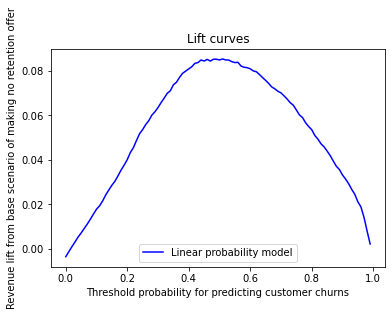

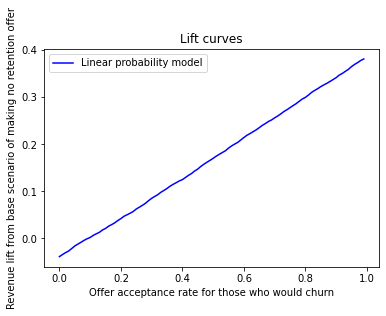

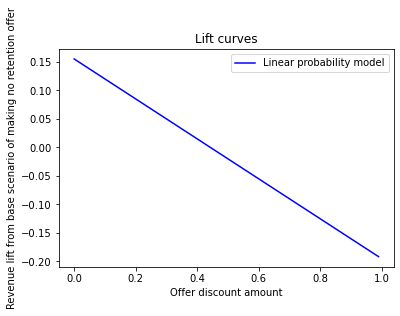

In [275]:
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 19
discount_amount = 0.2
cases = ['no_offer','cat_offer']


# base assessment
df_test, df_impact = apply_offers(x_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['cat_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['cat_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['cat_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Allocation

In [12]:
allo = pd.read_excel('/Users/yanglan/Desktop/Marketing Analytics/final/Copy of subscribers.xlsx')
allo

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,revenues
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,0.0,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaT,True,18.0564
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,0.0,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaT,True,18.3867
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,1.0,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,0.1101
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,0.0,...,ar,NaN,14,False,0,NaT,NaT,NaT,True,0.0367
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,0.0,...,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaT,True,36.1495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,0.0,...,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaT,True,18.3867
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,0.0,...,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaT,True,18.3867
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,0.0,...,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaT,True,18.0931
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,0.0,...,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaT,True,18.0564


In [19]:
allo.columns.values

array(['Unnamed: 0', 'subid', 'package_type',
       'num_weekly_services_utilized', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'num_ideal_streaming_services', 'age',
       'male_TF', 'country', 'attribution_technical',
       'attribution_survey', 'op_sys', 'months_per_bill_period',
       'plan_type', 'monthly_price', 'discount_price',
       'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language',
       'payment_type', 'num_trial_days', 'current_sub_TF',
       'payment_period', 'last_payment', 'next_payment', 'cancel_date',
       'trial_completed', 'revenues'], dtype=object)

## Calculate Average CAC, CLV and ROI

### To find the total customers gained by each 'technical' channel

In [21]:
total_customers_by_technical_channel = allo.groupby('attribution_technical')['revenues'].count()
total_customers_by_technical_channel = 1/2 * total_customers_by_technical_channel
total_customers_by_technical_channel
#I use linear allocation model here
#meaning both 'attribution_technical' channel and 'attribution_survey' channel account for 50% of each conversion
#The following three cells will follow suit.

attribution_technical
affiliate                   4947.0
appstore                      22.0
bing                         573.0
bing_organic                 184.5
brand sem intent bing       1115.5
brand sem intent google     9262.0
content_greatist               2.5
criteo                        22.0
direct_mail                   69.5
discovery                   1285.5
display                      703.5
email                      12845.0
email_blast                 3638.5
facebook                   40125.5
facebook_organic            1636.0
google_organic              5345.5
influencer                    10.5
internal                     561.0
organic                    11006.5
other                        893.0
ott                           79.0
pinterest                   3032.5
pinterest_organic             15.0
playstore                      6.0
podcast                      492.5
quora                         50.0
referral                    2585.0
samsung                       43.

### To find the total revenues gained by each 'technical' channel

In [26]:
total_revenues_by_technical_channel = allo.groupby('attribution_technical')['revenues'].sum()
total_revenues_by_technical_channel = 1/2*total_revenues_by_technical_channel
total_revenues_by_technical_channel

attribution_technical
affiliate                   75437.565650
appstore                      264.368450
bing                         6927.400250
bing_organic                 1837.605700
brand sem intent bing       12795.932100
brand sem intent google    130533.587450
content_greatist                9.560350
criteo                        334.832450
direct_mail                  1174.124750
discovery                   22673.021450
display                      7773.115050
email                      177525.643700
email_blast                 64872.149450
facebook                   548492.399901
facebook_organic            25562.577600
google_organic              74866.165000
influencer                    181.591600
internal                     8774.180950
organic                    136255.172500
other                       13301.786550
ott                          1034.334450
pinterest                   53452.650850
pinterest_organic             317.785300
playstore                      63.9

### To find the total customers gained by each 'survey' channel

In [23]:
total_customer_by_survey_channel = allo.groupby('attribution_survey')['revenues'].count()
total_customer_by_survey_channel = 1/2 * total_customer_by_survey_channel
total_customer_by_survey_channel

attribution_survey
affiliate             981.0
amfm_radio            168.5
direct_mail           204.0
facebook            59563.0
facebook_organic      382.5
other                3248.0
ott                   721.5
pinterest            3928.0
podcast              1497.5
public_radio         3109.5
referral            10441.0
search               4246.0
sirius xm             561.0
social_organic       1934.5
tv                  19952.0
youtube              1554.0
Name: revenues, dtype: float64

### To find the total revenues gained by each 'survey' channel

In [25]:
total_revenues_by_survey_channel = allo.groupby('attribution_survey')['revenues'].sum()
total_revenues_by_survey_channel = 1/2*total_revenues_by_survey_channel
total_revenues_by_survey_channel

attribution_survey
affiliate            16436.86570
amfm_radio            2021.80300
direct_mail           3841.88445
facebook            793956.11105
facebook_organic      5003.12750
other                60309.03660
ott                  10384.66870
pinterest            76947.38530
podcast              26257.14345
public_radio         55306.14765
referral            248616.88340
search               75269.27780
sirius xm            10125.25475
social_organic       37188.89905
tv                  172527.83770
youtube              27361.70335
Name: revenues, dtype: float64

In [28]:
total_revenues_by_survey_channel[0]

16436.86569999984

## Marginal CAC

In [35]:
allo["account_creation_date"] = pd.to_datetime(allo["account_creation_date"],format ="%Y/%m/%d") # 转化为时间格式
#allo.groupby([allo["account_creation_date"].apply(lambda x:x.year)],
#            [allo["account_creation_date"].apply(lambda x:x.month)]).count() # 按照【生日】的【年份】分组
open_day='2020/03/01'
con1=allo['account_creation_date']>=open_day
m_allo = allo[con1]
m_allo = m_allo.dropna(subset=['account_creation_date'])
m_allo

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,revenues
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,0.0,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaT,True,18.3867
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,0.0,...,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaT,True,18.3867
7,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,0.0,...,ar,RAKBANK,14,True,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaT,True,18.0564
15,143042,26874196,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,0.0,...,ar,Paypal,14,True,1,2020-03-23 03:09:57,2020-07-23 03:09:57,NaT,True,18.0564
21,384799,22090440,base,4.0,drama,access to exclusive content,22.951579,2.0,65.0,0.0,...,ar,NaN,14,True,1,2020-03-17 17:33:57,2020-07-17 17:33:57,NaT,True,18.3867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227569,376305,22732963,enhanced,4.0,drama,access to exclusive content,30.201361,3.0,50.0,0.0,...,ar,NaN,14,True,0,NaT,2020-04-09 03:29:36,NaT,True,0.0000
227589,446027,24139708,base,NaN,drama,access to exclusive content,34.551230,NaN,38.0,1.0,...,ar,NaN,14,True,0,NaT,2020-03-30 12:55:39,NaT,True,0.3303
227596,338767,21934088,base,3.0,international,replace OTT,28.751405,2.0,30.0,0.0,...,ar,Standard Charter,14,True,0,NaT,2020-04-06 17:37:55,NaT,True,0.1101
227608,157820,29190645,enhanced,3.0,comedy,access to exclusive content,25.851492,2.0,46.0,0.0,...,ar,RAKBANK,14,True,1,2020-03-16 22:42:33,2020-07-16 22:42:33,NaT,True,18.3867


### To find the marginal customers gained by each 'technical' channel in March

In [36]:
marginal_customers_by_technical_channel = m_allo.groupby('attribution_technical')['revenues'].count()
marginal_customers_by_technical_channel = 1/2 * marginal_customers_by_technical_channel
marginal_customers_by_technical_channel

attribution_technical
affiliate                   810.5
appstore                      9.0
bing                         86.0
bing_organic                 48.0
brand sem intent bing       164.0
brand sem intent google     882.5
content_greatist              0.5
direct_mail                   1.0
discovery                    25.0
display                      72.5
email                      1753.5
email_blast                  28.0
facebook                   3444.5
facebook_organic            107.5
google_organic             1114.5
influencer                    1.5
internal                     33.5
organic                    2063.0
other                       131.0
ott                          17.5
pinterest                   227.5
pinterest_organic             1.5
playstore                     1.0
podcast                      82.0
referral                    284.0
search                     1546.5
vod                          36.0
youtube                      89.0
Name: revenues, dtype: flo

### To find the marginal customers gained by each 'survey' channel in March

In [37]:
marginal_customers_by_survey_channel = m_allo.groupby('attribution_survey')['revenues'].count()
marginal_customers_by_survey_channel = 1/2 * marginal_customers_by_survey_channel
marginal_customers_by_survey_channel

attribution_survey
affiliate            126.5
amfm_radio            60.0
direct_mail           10.0
facebook            5123.5
facebook_organic      83.5
other                333.5
ott                  252.5
pinterest            328.5
podcast              276.5
public_radio         238.5
referral            1324.5
search               544.0
sirius xm             82.5
social_organic       186.5
tv                  3444.5
youtube              222.5
Name: revenues, dtype: float64